# Description

- **The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars**

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection  import train_test_split
from scipy.stats import zscore
#import sklearn.metrics
vechicle_df = pd.read_csv("vehicle-1.csv")
vechicle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [79]:
vechicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [80]:
vechicle_df.shape

(846, 19)

# Observations:
- **Compactness has mean and median values almost similar , it signifies that it is normally distribited and has no skewness/outlier**
- **circularity : it also seems to be normally distribted as mean amd median has similar values**
- **scatter_ratio feature seems to be having some kind of skewness and outlier**

In [81]:
vechicle_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [82]:
vechicle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [83]:
vechicle_df.iloc[:, 0:18]

compactness  circularity  distance_circularity  radius_ratio  \
0             95         48.0                  83.0         178.0   
1             91         41.0                  84.0         141.0   
2            104         50.0                 106.0         209.0   
3             93         41.0                  82.0         159.0   
4             85         44.0                  70.0         205.0   
..           ...          ...                   ...           ...   
841           93         39.0                  87.0         183.0   
842           89         46.0                  84.0         163.0   
843          106         54.0                 101.0         222.0   
844           86         36.0                  78.0         146.0   
845           85         36.0                  66.0         123.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                    72.0                       10          162.0   
1                    57.0                        9          149.0   
2                    66.0                       10          207.0   
3                    63.0                        9          144.0   
4                   103.0                       52          149.0   
..                    ...                      ...            ...   
841                  64.0                        8          169.0   
842                  66.0                       11          159.0   
843                  67.0                       12          222.0   
844                  58.0                        7          135.0   
845                  55.0                        5          120.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0             42.0                    20.0                        159   
1             45.0                    19.0                        143   
2             32.0                    23.0                        158   
3             46.0                    19.0                        143   
4             45.0                    19.0                        144   
..             ...                     ...                        ...   
841           40.0                    20.0                        134   
842           43.0                    20.0                        159   
843           30.0                    25.0                        173   
844           50.0                    18.0                        124   
845           56.0                    17.0                        128   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0              176.0              379.0                      184.0   
1              170.0              330.0                      158.0   
2              223.0              635.0                      220.0   
3              160.0              309.0                      127.0   
4              241.0              325.0                      188.0   
..               ...                ...                        ...   
841            200.0              422.0                      149.0   
842            173.0              368.0                      176.0   
843            228.0              721.0                      200.0   
844            155.0              270.0                      148.0   
845            140.0              212.0                      131.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                           70.0             6.0              16.0   
1                           72.0             9.0              14.0   
2                           73.0            14.0               9.0   
3                           63.0             6.0              10.0   
4                          127.0             9.0              11.0   
..                           ...             ...               ...   
841                         72.0             7.0              25.0   
842                         72.0             1.0              20.0   

# Observation
-**Convert OBject to int type using Label**

In [84]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
vechicle_df['class']= label_encoder.fit_transform(vechicle_df['class']) 
#vechicle_df['class']=vechicle_df['class'].to_dict()
vechicle_df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio  class  
0             187.0            197      2  
1             189.0            199      2  
2             188.0            196      1  
3             199.0            207      2  
4             180.0        

In [85]:
vechicle_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                            int32
dtype: object

In [86]:
vechicle_df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [87]:
vechicle_df.duplicated().sum()

0

In [88]:
vechicle_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

# Observations

-**Need to use imputer to get missing data**

In [89]:
from sklearn.impute import SimpleImputer
vechicle_df_Impute = vechicle_df.copy()
imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
imputer = imp_mean.fit(vechicle_df_Impute.iloc[:,:-1])
imputed_data = imputer.transform(vechicle_df.iloc[:,:-1].values)
vechicle_df_Impute.iloc[:,:-1] = imputed_data

In [90]:
result_compactness  = pd.concat([vechicle_df_Impute.isna().sum(),vechicle_df.isna().sum()], axis=1)
print("                   Imputed_val","  original_val")
print(result_compactness)

                   Imputed_val   original_val
                             0  1
compactness                  0  0
circularity                  0  5
distance_circularity         0  4
radius_ratio                 0  6
pr.axis_aspect_ratio         0  2
max.length_aspect_ratio      0  0
scatter_ratio                0  1
elongatedness                0  1
pr.axis_rectangularity       0  3
max.length_rectangularity    0  0
scaled_variance              0  3
scaled_variance.1            0  2
scaled_radius_of_gyration    0  2
scaled_radius_of_gyration.1  0  4
skewness_about               0  6
skewness_about.1             0  1
skewness_about.2             0  1
hollows_ratio                0  0
class                        0  0


In [91]:
vechicle_df_Impute.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.689743     0.620912              0.767035   
pr.axis_aspect_ratio            0.091534     0.153778              0.158456   
max.length_aspect_ratio         0.148249     0.251467              0.264686   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.762070     0.796306              0.861519   
scaled_variance.1               0.814012     0.835946              0.886017   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.249593     0.051946             -0.225944   
skewness_about                  0.236078     0.144198              0.113924   
skewness_about.1                0.157015    -0.011439              0.265547   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   
class                          -0.033796    -0.158910             -0.064467   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.689743              0.091534   
circularity                      0.620912              0.153778   
distance_circularity             0.767035              0.158456   
radius_ratio                     1.000000              0.663447   
pr.axis_aspect_ratio             0.663447              1.000000   
max.length_aspect_ratio          0.450052              0.648724   
scatter_ratio                    0.734429              0.103732   
elongatedness                   -0.789481             -0.183035   
pr.axis_rectangularity           0.708385              0.079604   
max.length_rectangularity        0.568949              0.126909   
scaled_variance                  0.793415              0.272910   
scaled_variance.1                0.718436              0.089189   
scaled_radius_of_gyration        0.536372              0.121971   
scaled_radius_of_gyration.1     -0.180397              0.152950   
skewness_about                   0.048713             -0.058371   
skewness_about.1                 0.173741             -0.031976   
skewness_about.2                 0.382214              0.239886   
hollows_ratio                    0.471309              0.267725   
class                           -0.182186             -0.098178   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.148249       0.812620   
circularity                                 0.251467       0.847938   
distance_circularity                        0.264686       0.905076   
radius_ratio                                0.450052       0.734429   
pr.axis_aspect_ratio                        0.648724       0.103732   
max.length_aspect_ratio                     1.000000       0.166191   
scatter_ratio                               0.166191       1.000000   
elongatedness                              -0.180140      -0.971601   
pr.axis_rectangularity                      0.161502       0.989751   
max.length_rectangularity                   0.305943       0.809083   
scaled_variance                             0.318957       0.948662   
scaled_variance.1                           0.143253       0.993012   
scaled_radius_of_gyration                   0.189743       0.799875   
scaled_radius_of_gyration.1                 0.295735      -0.027542   
skewness_about                            

In [92]:
print('Skewness of each column:\n', vechicle_df_Impute[vechicle_df_Impute.columns].skew().sort_values(ascending=False))

Skewness of each column:
 max.length_aspect_ratio        6.778394
pr.axis_aspect_ratio           3.835392
scaled_radius_of_gyration.1    2.089979
scaled_variance.1              0.845345
skewness_about                 0.780813
pr.axis_rectangularity         0.774406
skewness_about.1               0.689014
scaled_variance                0.655598
scatter_ratio                  0.608710
radius_ratio                   0.397572
compactness                    0.381271
scaled_radius_of_gyration      0.279910
circularity                    0.264928
max.length_rectangularity      0.256359
skewness_about.2               0.249985
distance_circularity           0.108718
elongatedness                  0.046951
class                          0.031106
hollows_ratio                 -0.226341
dtype: float64


# Observation

-**If skewness is less than -1 or greater than 1, the distribution is highly skewed.**

-**If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.**

-**If skewness is between -0.5 and 0.5, the distribution is approximately symmetric.**

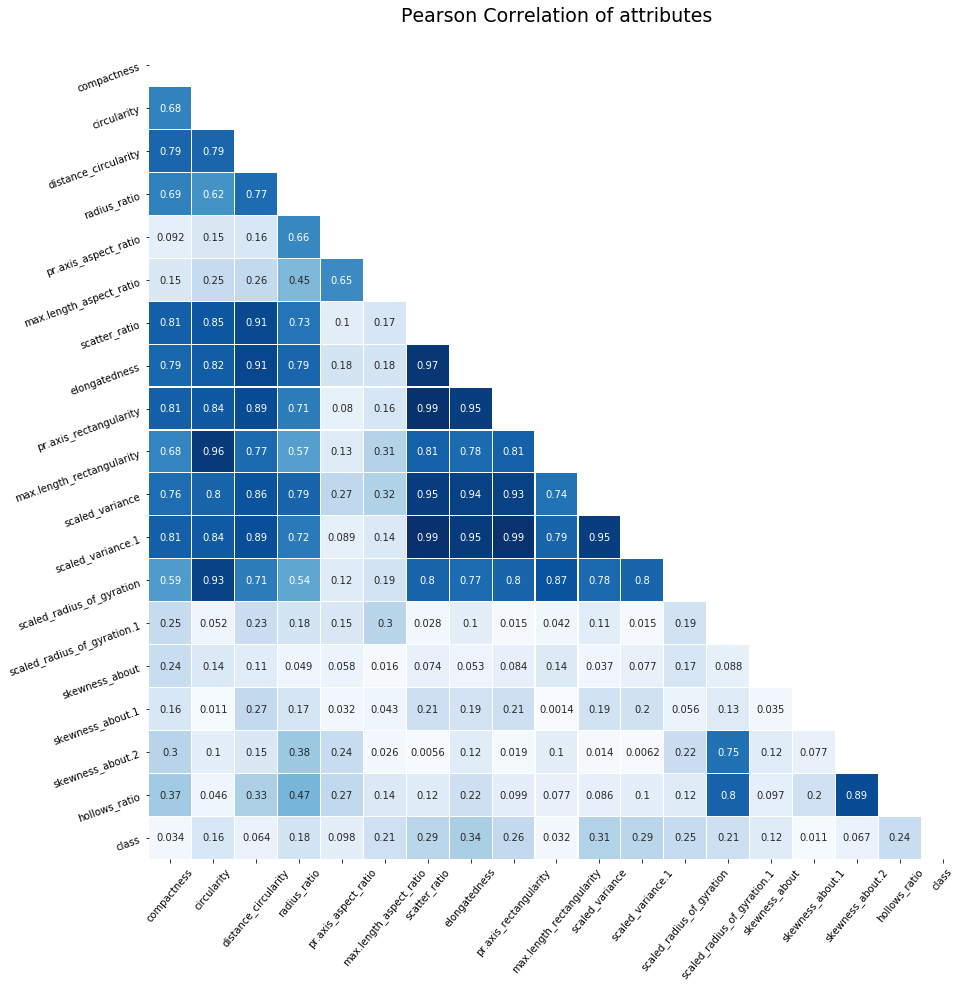

In [93]:
colormap = plt.cm.viridis # Color range to be used in heatmap
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of attributes', y=1.02, size=19)
lower_Triangle = np.tril(abs(vechicle_df_Impute.corr()),k=-1)
mask = lower_Triangle == 0
sns.heatmap(lower_Triangle,linewidths=0.2,center=0.5,vmax=1.0,cbar= False,xticklabels = vechicle_df_Impute.corr().index, yticklabels = vechicle_df_Impute.corr().columns,
            square=True, cmap='Blues', linecolor='white', annot=True,mask= mask)
plt.xticks(rotation = 50)   # Aesthetic purposes
plt.yticks(rotation = 20)   # Aesthetic purposes
plt.show()

   # observations 
      
- **Scaled Variance & Scaled Variance.1 seems to be strongly correlated with value of 0.98**
      
- **skewness_about_2 and hollow_ratio seems to be strongly correlated, corr coeff: 0.89**
      
- **ditance_circularity and radius_ratio seems to have high positive correlation with corr coeff: 0.81**
      
- **compactness & circularity , radius_ratio & pr.axis_aspect_ratio also seems ver averagely correlated with coeff:            0.67.**
      
- **scaled _variance and scaled_radius_of_gyration, circularity & distance_circularity also seems to be highly                 correlated with corr coeff: 0.79**
- **pr.axis_recatngularity and max.length_recatngularity also seems to be strongly correlated with coeff: 0.81** 
- **scatter_ratio and elongatedness seems to be have strong negative correlation val : 0.97**
- **elongatedness and pr.axis_rectangularity seems to have strong negative correlation, val:  0.95**

In [94]:
#sns.pairplot(vechicle_df_Impute)

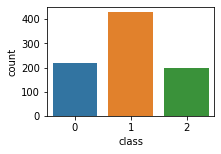

In [95]:
plt.figure(figsize=(3,2))
sns.countplot(vechicle_df_Impute['class'])

# Observation
- **As data is relative to class 1 more than 20 % there is no much scope for data imbalance**

# Univariate Analysis

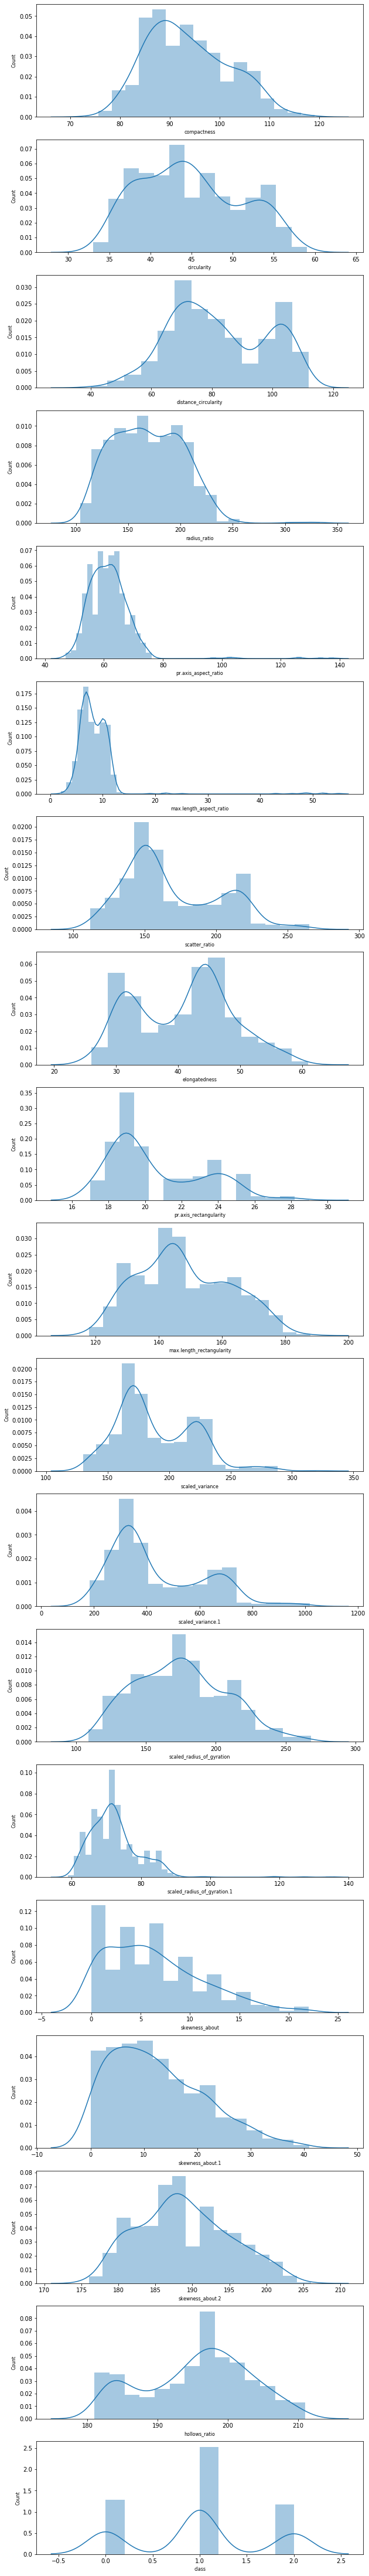

In [96]:
col_names = []
for col_name in  vechicle_df_Impute.columns: 
    col_names.append(col_name)
#print(col_names)
fig, ax = plt.subplots(len(col_names), figsize=(10,80))

for i, col_val in enumerate(col_names):

    sns.distplot(vechicle_df_Impute[col_val], hist=True, ax=ax[i])
    #ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

# observation
- **normal distribution for features like**
- **positively skewed for feature like**

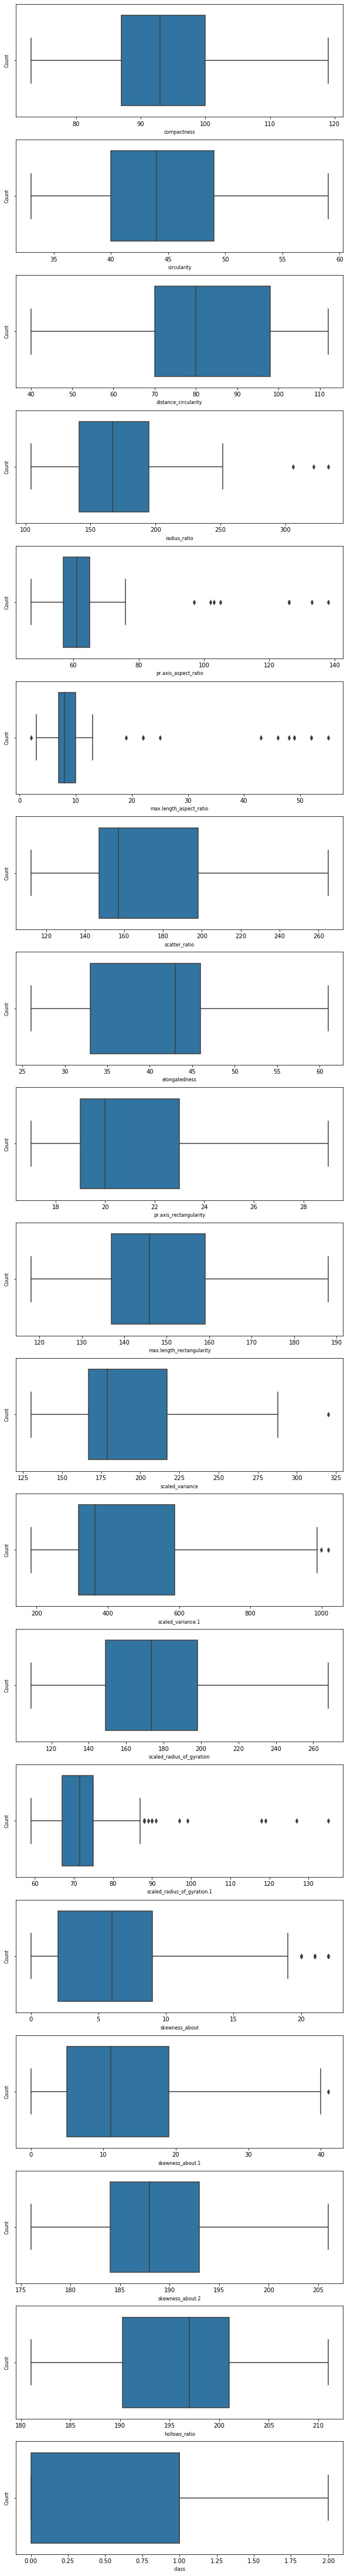

In [97]:
#sns.boxplot(x=boston_df['DIS']) 

col_names = []
for col_name in  vechicle_df_Impute.columns: 
    col_names.append(col_name)
#print(col_names)
fig, ax = plt.subplots(len(col_names), figsize=(10,80))

for i, col_val in enumerate(col_names):

    sns.boxplot(x=vechicle_df_Impute[col_val], ax=ax[i])
    #ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

In [98]:
vechicle_df_Impute.columns

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr.axis_aspect_ratio', 'max.length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr.axis_rectangularity', 'max.length_rectangularity',
       'scaled_variance', 'scaled_variance.1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration.1', 'skewness_about', 'skewness_about.1',
       'skewness_about.2', 'hollows_ratio', 'class'],
      dtype='object')

# Observations
- **Following has outliers from box plot radius_ratio,pr.axis_aspect_ratio, max.length_aspect_ratio,scaled_radius_of_gyration.1, skewness_about, skewness_about.1,scaled_variance, scaled_variance.1**


# Multivariate Analysis

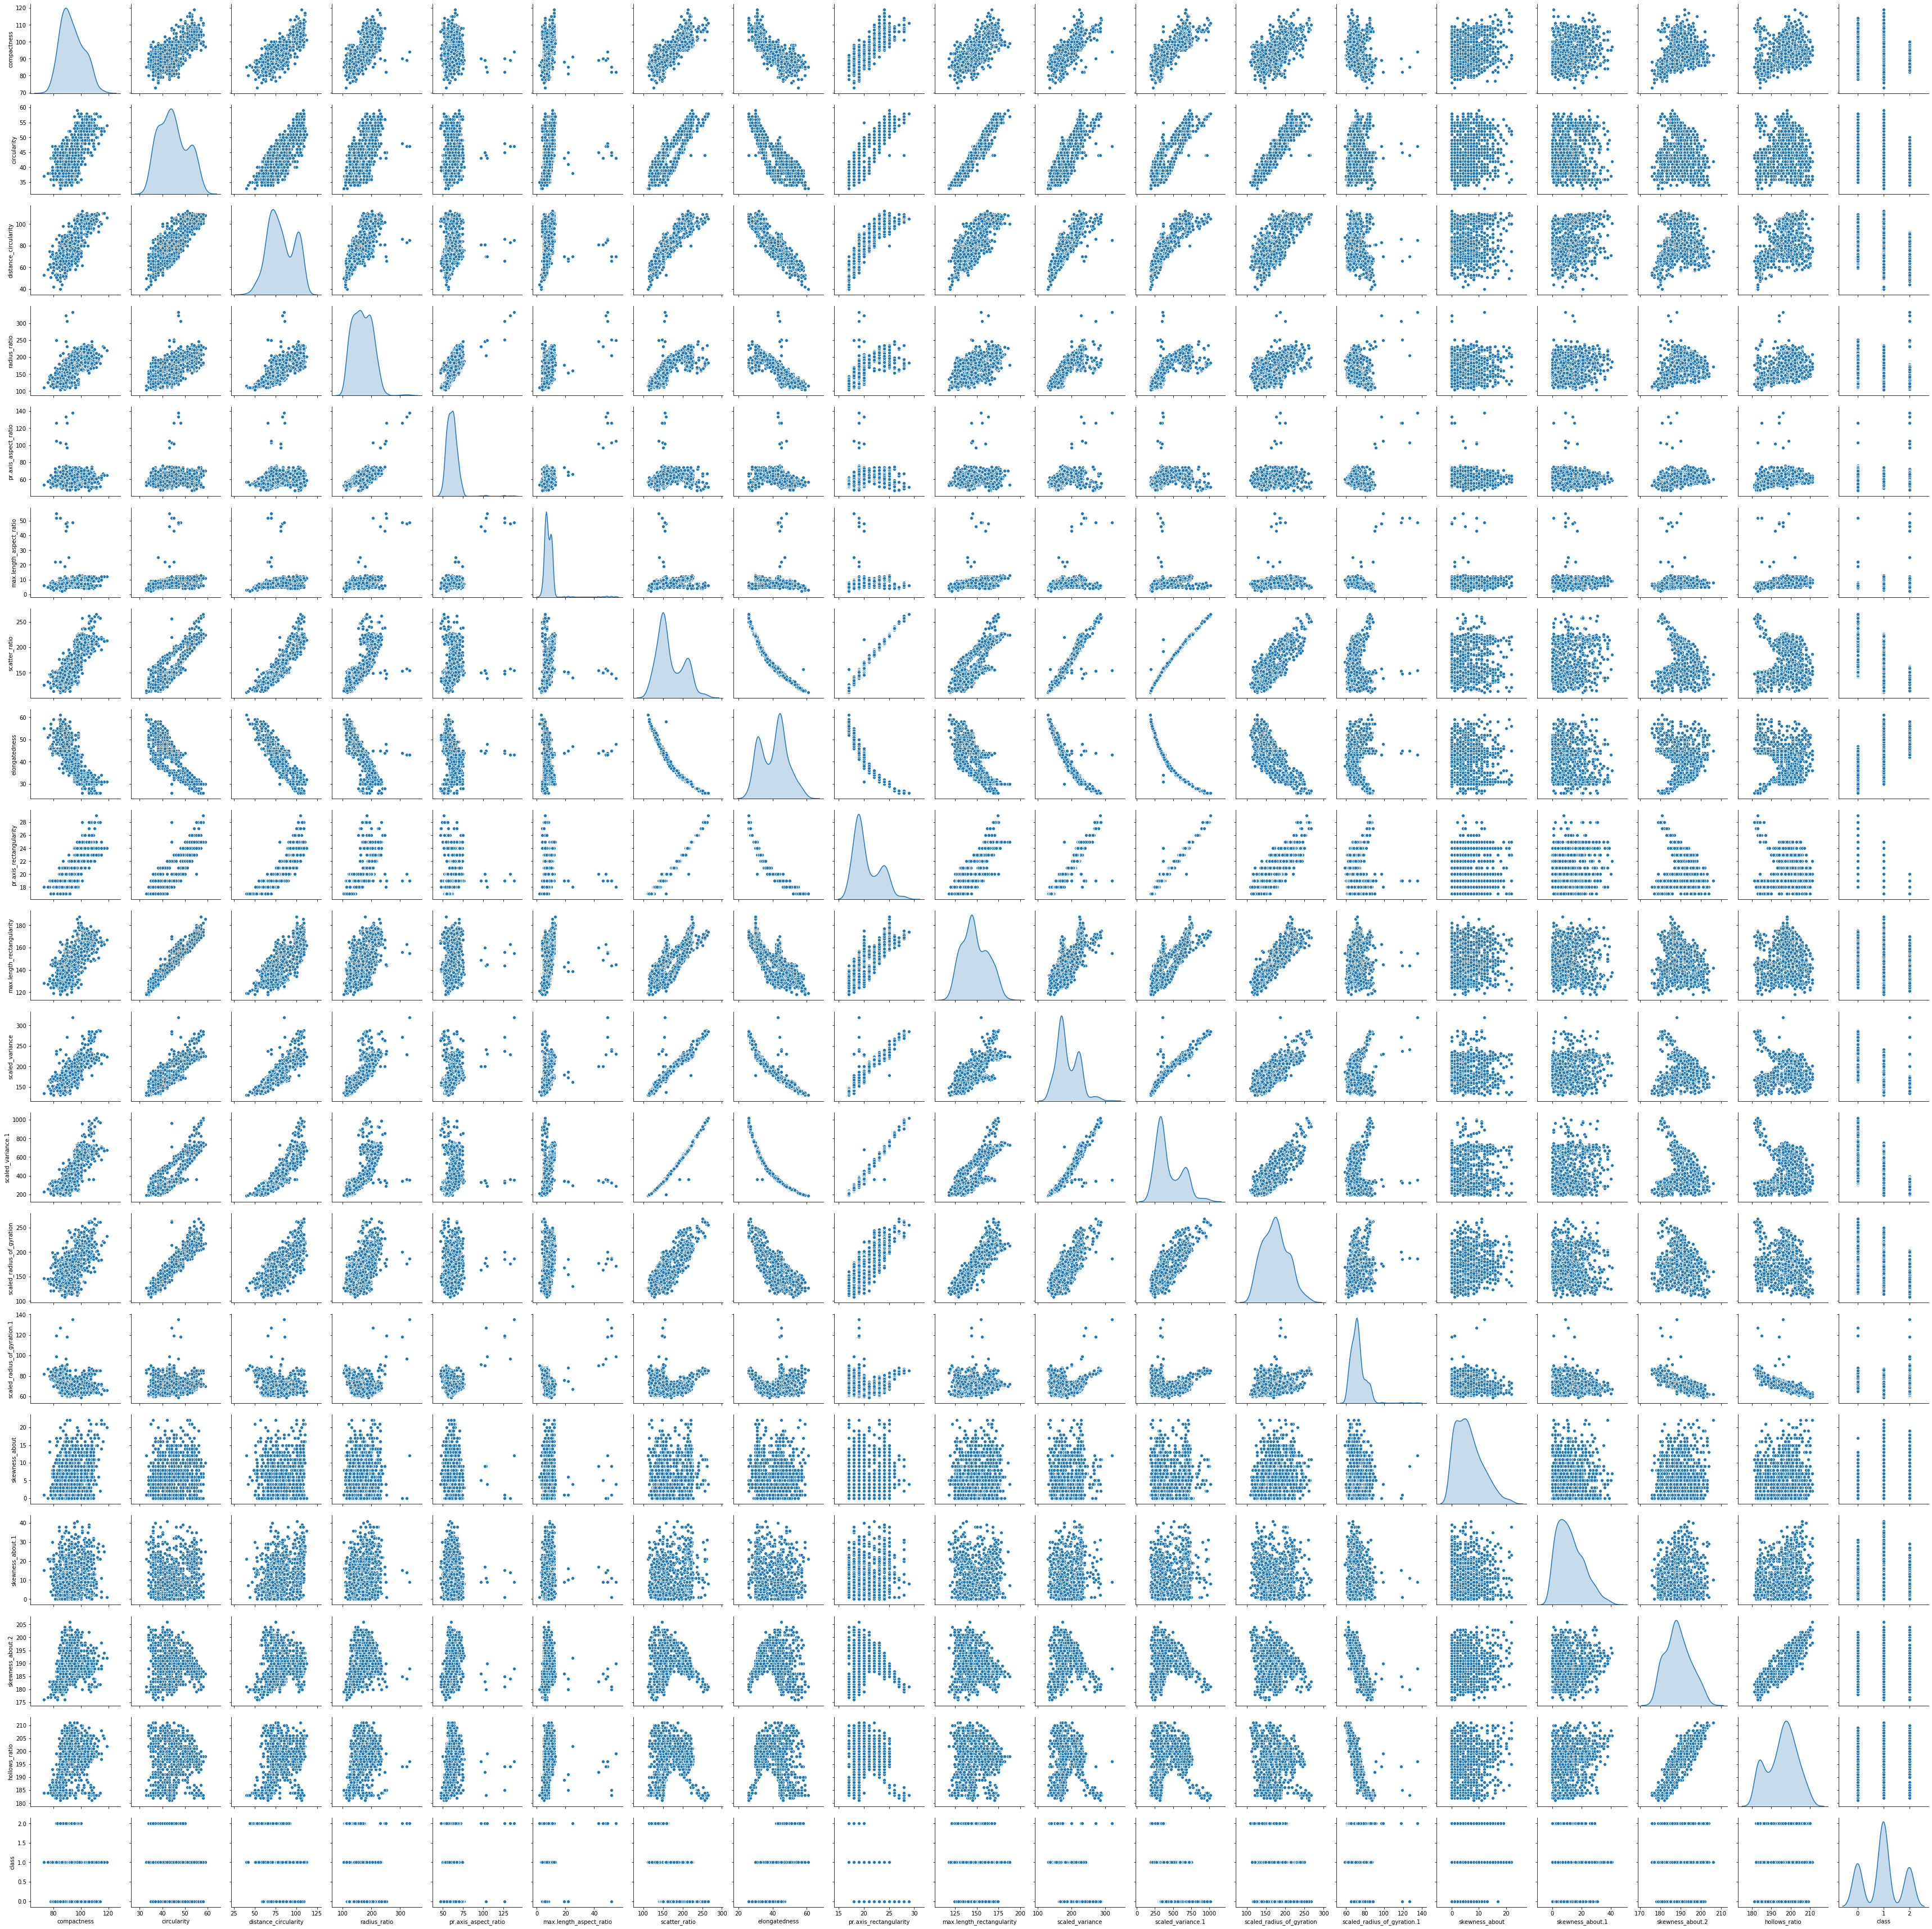

In [99]:
sns.pairplot(vechicle_df_Impute, diag_kind='kde')   # to plot density curve instead of histogram on the diag

In [100]:
import statsmodels.api as sm
#from  statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(data):
    vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
    x_var_names = data.columns
    for i in range(0, x_var_names.shape[0]):
        y = data[x_var_names[i]]
        x = data[x_var_names.drop([x_var_names[i]])]
        r_squared = sm.OLS(y,x).fit().rsquared
        #vif = [variance_inflation_factor(x,i) for i in range(x.shape[1])]  
        vif= round(1/(1-r_squared),2)
        vif_df.loc[i] = [x_var_names[i], vif]       
    return vif_df.sort_values(by = 'Vif', axis = 0, ascending=True, inplace=False)

#X=vechicle_df.drop(['class'],axis=1)
X=vechicle_df_Impute.iloc[:,:-1]
calculate_vif(X)

Var       Vif
14               skewness_about      3.42
15             skewness_about.1      4.49
5       max.length_aspect_ratio     15.53
12    scaled_radius_of_gyration    315.70
2          distance_circularity    339.43
11            scaled_variance.1    593.66
7                 elongatedness    652.73
0                   compactness    682.17
13  scaled_radius_of_gyration.1    717.64
4          pr.axis_aspect_ratio    802.01
3                  radius_ratio    819.28
10              scaled_variance   1343.65
1                   circularity   1635.53
9     max.length_rectangularity   2023.51
8        pr.axis_rectangularity   3927.34
6                 scatter_ratio   4720.11
16             skewness_about.2   9891.92
17                hollows_ratio  10191.24

# check for multicollinearity is the Variance Inflation Factor (VIF):

- **VIF=1, Very Less Multicollinearity**
- **VIF<5, Moderate Multicollinearity**
- **VIF>5, Extreme Multicollinearity**

# There are 8 such columns:

- **max.length_rectangularity**
- **scaled_radius_of_gyration**
- **skewness_about.2**
- **scatter_ratio**
- **elongatedness**
- **pr.axis_rectangularity**
- **scaled_variance**
- **scaled_variance.1**

# Conclusion
- **this is dimensionality curse we will apply PCA on data set**

# Outlier detection using stats


In [101]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(vechicle_df_Impute))   # get the z-score of every value with respect to their columns
threshold = 3
print(np.where(z > threshold))
print("-----------------------------------------------------------------------")
print(z[4][4])

(array([  4,   4,   4,  37,  37,  37,  37,  44,  85, 100, 100, 100, 123,
       132, 135, 135, 135, 135, 291, 291, 321, 321, 388, 388, 388, 388,
       388, 391, 396, 513, 516, 523, 523, 623, 687, 687, 706, 706, 706,
       733, 761, 835, 835, 835], dtype=int64), array([ 4,  5, 13,  3,  4,  5, 13,  0, 11,  4,  5, 13, 14, 15,  3,  4,  5,
       13,  4,  5, 10, 11,  3,  4,  5, 10, 13,  5, 10, 15, 14,  4,  5, 14,
       10, 11,  4,  5, 13, 10, 14,  8, 10, 11], dtype=int64))
-----------------------------------------------------------------------
5.245642630921364


# Observations:
- **Z-score for row 4th with column 4 is higher than threshold and an outlier**
- **4th record on column pr.axis_aspect_ratio is an outlier.**

# Treating Outlier

In [102]:
from scipy.stats import iqr
vechicle_df_outlier = vechicle_df_Impute.copy()
Q1 = vechicle_df_outlier.quantile(0.25)
Q3 = vechicle_df_outlier.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

compactness                     13.00
circularity                      9.00
distance_circularity            28.00
radius_ratio                    54.00
pr.axis_aspect_ratio             8.00
max.length_aspect_ratio          3.00
scatter_ratio                   51.00
elongatedness                   13.00
pr.axis_rectangularity           4.00
max.length_rectangularity       22.00
scaled_variance                 50.00
scaled_variance.1              268.50
scaled_radius_of_gyration       49.00
scaled_radius_of_gyration.1      8.00
skewness_about                   7.00
skewness_about.1                14.00
skewness_about.2                 9.00
hollows_ratio                   10.75
class                            1.00
dtype: float64


In [103]:
# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(vechicle_df_outlier < Q1 - 1.5 * IQR)[0], np.where(vechicle_df_outlier < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    vechicle_df_outlier.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(vechicle_df_outlier > Q3 + 1.5 * IQR)[0], np.where(vechicle_df_outlier > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    vechicle_df_outlier.iloc[i,j] = whisker[j]

In [104]:
vechicle_df_outlier.shape,vechicle_df_Impute.shape

((846, 19), (846, 19))

# Ploting box plot after outlier removal

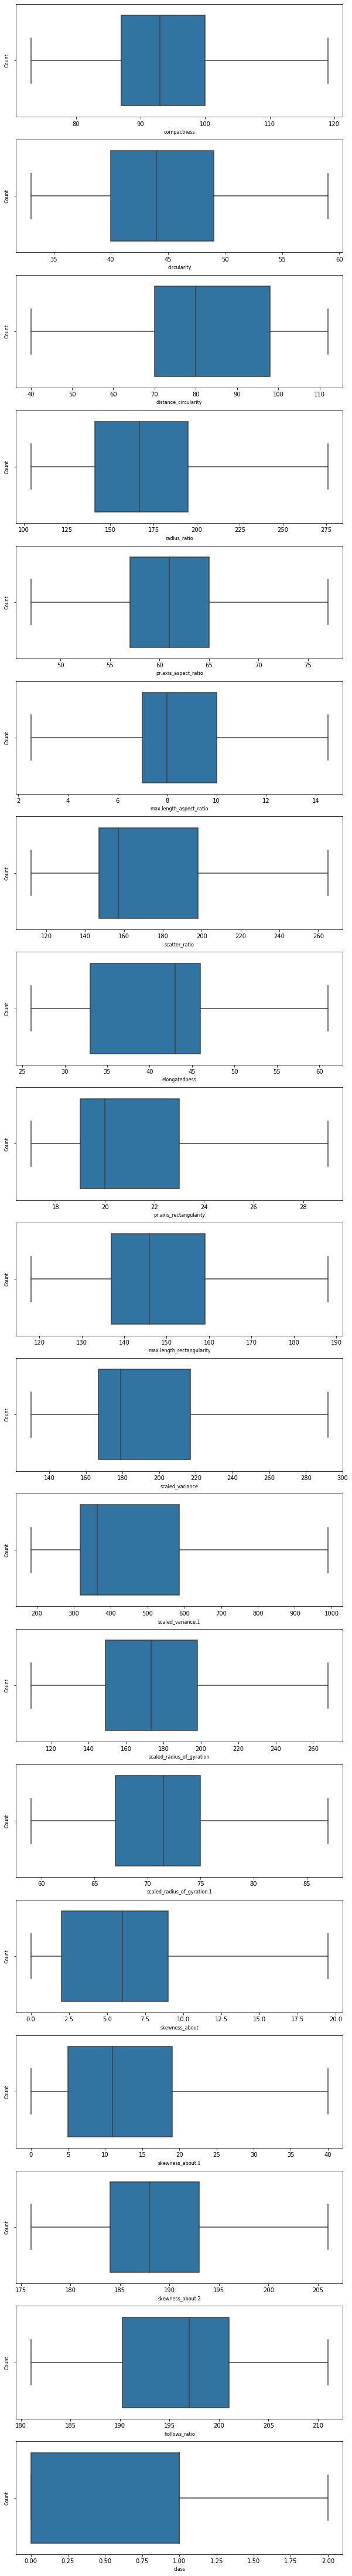

In [105]:
#sns.boxplot(x=boston_df['DIS']) 

col_names = []
for col_name in  vechicle_df_outlier.columns: 
    col_names.append(col_name)
#print(col_names)
fig, ax = plt.subplots(len(col_names), figsize=(10,80))

for i, col_val in enumerate(col_names):

    sns.boxplot(x=vechicle_df_outlier[col_val], ax=ax[i])
    #ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.show()

In [106]:
feature= vechicle_df_outlier.drop('class',axis=1)     # Predictor feature columns (8 X m)
target = vechicle_df_outlier['class'] 

# observation
-**we need to scale data as few parameter shows higher data ranges then rest so below is scaling**

In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
# create a feature preparation pipeline for a model
def make_pipeline(model):
    steps = list()
    # standardization
    steps.append(('standardize', StandardScaler()))
    # normalization
    steps.append(('normalize', MinMaxScaler()))
    # the model
    steps.append(('model', model))
    # create pipeline
    pipeline = Pipeline(steps=steps)
    return pipeline

# Observation
- **Split Data before Scaling and do scaling on train data**

In [108]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.3, random_state=1)
# 1 is just any random seed number

X_train.head()

compactness  circularity  distance_circularity  radius_ratio  \
350         97.0         46.0                 101.0         210.0   
40          95.0         48.0                 104.0         214.0   
89          80.0         37.0                  57.0         116.0   
427         86.0         38.0                  89.0         176.0   
353         81.0         47.0                  69.0         146.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
350                  66.0                      8.0          192.0   
40                   67.0                      9.0          205.0   
89                   55.0                      6.0          125.0   
427                  59.0                      9.0          169.0   
353                  64.0                      6.0          151.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
350           35.0                    22.0                      151.0   
40            32.0                    23.0                      151.0   
89            54.0                    18.0                      125.0   
427           39.0                    20.0                      132.0   
353           44.0                    19.0                      147.0   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
350            208.0              546.0                      169.0   
40             227.0              628.0                      202.0   
89             142.0              229.0                      132.0   
427            190.0              428.0                      148.0   
353            171.0              340.0                      195.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
350                         66.0             1.0              32.0   
40                          74.0             5.0               9.0   
89                          81.0             8.0               5.0   
427                         67.0             7.0              33.0   
353                         75.0             5.0               0.0   

     skewness_about.2  hollows_ratio  
350             191.0          200.0  
40              186.0          193.0  
89              178.0          184.0  
427             193.0          202.0  
353             183.0          188.0

In [109]:
from sklearn import svm
from sklearn import metrics
svm1 = svm.SVC(gamma=0.025, C=3,probability=True)
make_pipeline(svm1)
svm1.fit(X_train,y_train)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.025, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [110]:

print("Accuracy on training set: {:.2f}".format(svm1.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svm1.score(X_test, y_test)))

Accuracy on training set: 1.00
Accuracy on test set: 0.54


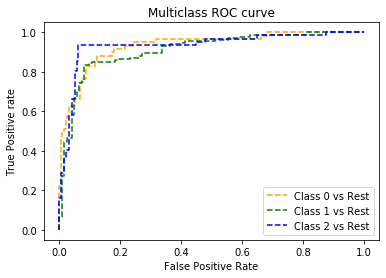

In [111]:
# roc curve for classes
from sklearn.metrics import roc_curve
pred_prob = svm1.predict_proba(X_test)
fpr = {}
tpr = {}
thresh ={}

n_class = 3
#xtrain_pca6, xtest_pca6, ytrain_pca6, ytest_pca6
for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=600);    

In [112]:
from sklearn import metrics
y_pred = svm1.predict(X_test)
print(metrics.accuracy_score(y_test , y_pred) )
print(metrics.classification_report(y_test , y_pred))

0.5354330708661418
              precision    recall  f1-score   support

           0       1.00      0.02      0.03        59
           1       0.53      1.00      0.69       133
           2       1.00      0.03      0.06        62

    accuracy                           0.54       254
   macro avg       0.84      0.35      0.26       254
weighted avg       0.75      0.54      0.39       254



In [113]:
result_raw = pd.DataFrame({
                        'Model' : 'No PCA',                        
                           'Accuracy Score' : [metrics.accuracy_score(y_test , y_pred)],
                            'Train Score' : [svm1.score(X_train,y_train)],
                           'Test Score' : [svm1.score(X_test , y_test)]})
print(result_raw)       
              

    Model  Accuracy Score  Train Score  Test Score
0  No PCA        0.535433          1.0    0.535433


Confusion Matrix For : 
 original data set [[  1  58   0]
 [  0 133   0]
 [  0  60   2]]


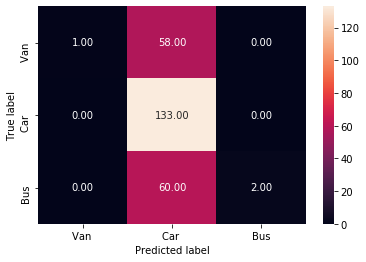

In [114]:
from sklearn.metrics import confusion_matrix
from sklearn import svm
from sklearn import metrics

def draw_confmatrix(y_test, yhat, str1, str2, str3, datatype ):
    #Make predictions and evalute
    #model_pred = fit_test_model(model,X_train, y_train, X_test)
    cm = confusion_matrix( y_test, yhat, [0,1,2] )
    print("Confusion Matrix For :", "\n",datatype,cm )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [str1, str2,str3] , yticklabels = [str1, str2,str3] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
draw_confmatrix(y_test, y_pred,"Van ", "Car ", "Bus", "original data set" )


In [115]:
import warnings
warnings.simplefilter('ignore')
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=15, random_state=1)
cv_results = model_selection.cross_val_score(make_pipeline(svm1), feature, target, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % ("\n SVM", cv_results.mean(), cv_results.std())
print(msg)


 SVM: 0.887678 (0.036136)


# PCA Analysis

In [116]:
pca_feature = feature.copy() 
pca_target = target.copy()

In [117]:
from scipy.stats import zscore
pca_feature_Scaled=pca_feature.apply(zscore)

In [118]:
print(pca_feature_Scaled.shape)
print(pca_target.shape)

(846, 18)
(846,)


In [119]:
from sklearn.decomposition import PCA
pca = PCA(n_components=18,random_state=1)
pca.fit(pca_feature_Scaled)
Xpca = pca.transform(pca_feature_Scaled)
std_X = pca.fit_transform(pca_feature_Scaled)

In [120]:
std_X.shape

(846, 18)

In [121]:
covMatrix = np.cov(Xpca,rowvar=False)
print(covMatrix)

[[ 9.68821710e+00  3.15329616e-16 -6.47476812e-16 -1.28234044e-16
  -7.39973500e-16  5.73899902e-16 -5.25549361e-16  1.45261843e-15
   5.04527386e-16  5.33958151e-16  4.28848278e-16  4.97169695e-16
  -1.22978550e-16  1.28234044e-16  7.57316629e-16 -4.77198820e-16
   1.29810692e-16  2.52789243e-16]
 [ 3.15329616e-16  3.30348551e+00  4.64585635e-16  1.49256018e-15
  -2.03492712e-15  7.75710856e-16 -3.24789505e-16 -9.45988849e-17
  -1.10365366e-16  4.24643884e-16  1.70277993e-16 -2.38073860e-16
  -4.67738931e-17 -2.97460938e-16  2.74599541e-17  4.46191407e-16
   7.69929814e-17 -1.00511315e-16]
 [-6.47476812e-16  4.64585635e-16  1.19681321e+00  3.43288842e-15
  -6.51681207e-16  3.16906265e-16 -1.94978813e-16  5.06629584e-16
  -8.09346016e-17  1.74482388e-16  1.23504100e-17 -1.89197770e-16
   4.25694982e-17 -1.40190292e-16  6.30659233e-18 -1.46759659e-16
  -9.67010824e-17 -2.25821991e-17]
 [-1.28234044e-16  1.49256018e-15  3.43288842e-15  1.16932745e+00
   1.68175795e-16 -4.83505412e-17 -7.

In [122]:
#Split the PCA data into train and test.

#xtrain_pca, xtest_pca, ytrain_pca, ytest_pca = train_test_split(Xpca, pca_target, test_size = 0.30, random_state=1)

Eigen Values

In [123]:
print(pca.explained_variance_)

[9.68821710e+00 3.30348551e+00 1.19681321e+00 1.16932745e+00
 8.74901453e-01 7.43140206e-01 3.44894368e-01 2.21139161e-01
 1.34915070e-01 9.65753117e-02 6.29671897e-02 5.80644748e-02
 4.14866852e-02 3.11934986e-02 2.14924847e-02 1.96166828e-02
 1.01029302e-02 2.96899567e-03]


Eigen Vector


In [124]:
print(pca.components_)

[[ 2.72551879e-01  2.88538242e-01  3.02629461e-01  2.67794096e-01
   9.59671499e-02  1.83748327e-01  3.11246539e-01 -3.09416323e-01
   3.08016913e-01  2.79389394e-01  3.01503271e-01  3.07493587e-01
   2.65080664e-01 -4.10598068e-02  4.12798057e-02  5.85351242e-02
   3.60220667e-02  8.24976294e-02]
 [-9.25238154e-02  1.29086711e-01 -5.14431857e-02 -1.94720199e-01
  -2.42447960e-01 -1.02486421e-01  7.18258758e-02 -9.25189066e-03
   8.41829742e-02  1.18957911e-01  7.37205566e-02  7.87954390e-02
   2.09492945e-01  5.00292034e-01 -3.93389358e-02 -9.85388499e-02
  -5.07468412e-01 -5.13655834e-01]
 [ 1.17595212e-02 -2.05364249e-01  9.16318241e-02 -2.96962770e-02
  -2.45094822e-01 -1.42454995e-01  1.20706463e-01 -8.57269269e-02
   1.24543439e-01 -2.04900804e-01  1.18879272e-01  1.23975370e-01
  -2.13189477e-01  1.90121300e-02 -3.99210690e-01  7.42715665e-01
  -4.56808061e-02 -1.52859164e-02]
 [-2.00271201e-01 -1.10912415e-02 -6.83523545e-02  2.82535767e-01
   6.10437234e-01 -4.53545697e-02 -1.

In [125]:
print(pca.explained_variance_ratio_)

[5.37598073e-01 1.83310038e-01 6.64110296e-02 6.48858482e-02
 4.85481828e-02 4.12367661e-02 1.91381495e-02 1.22709871e-02
 7.48642201e-03 5.35895314e-03 3.49404225e-03 3.22199115e-03
 2.30209148e-03 1.73092371e-03 1.19261555e-03 1.08852751e-03
 5.60610456e-04 1.64749235e-04]


In [126]:
eigenvalues, eigenvectors = np.linalg.eig(covMatrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-1.00000000e+00 -4.93880772e-17  7.62508557e-17 -1.50529059e-17
  -8.39608531e-17  6.41581854e-17 -5.62486576e-17  1.53438943e-16
  -5.28118325e-17  5.56691088e-17  4.45545084e-17 -5.16263568e-17
   2.61004406e-17  1.27482105e-17  1.34128085e-17 -1.32788372e-17
   4.93555219e-17  7.83426299e-17]
 [-4.36935061e-17  1.00000000e+00 -6.58178955e-17  7.19653860e-16
  -7.95374768e-16  3.26006241e-16 -1.59995730e-16  1.29878983e-16
   2.39227565e-17  1.01226353e-16  5.82265351e-17  9.74249279e-17
   1.23399279e-17  1.62054511e-17  1.09669591e-17  7.81261244e-17
  -1.00564857e-16 -2.15236960e-17]
 [ 7.51224822e-17  1.36416052e-16  1.00000000e+00  1.14132283e-13
  -2.79554359e-15  1.10398386e-15 -1.78595354e-16  5.44979901e-16
  -1.41583110e-17  1.22400931e-16  1.55705393e-17  1.25432693e-16
   5.86707216e-17 -3.92973350e-17 -2.94336833e-17  1.40497464e-16
   1.84494017e-16  2.76739696e-16]
 [ 1.48404411e-17 -8.81632367e-17  1.15169855e-13 -1.00000000e+00
   2.47782221e-15 -

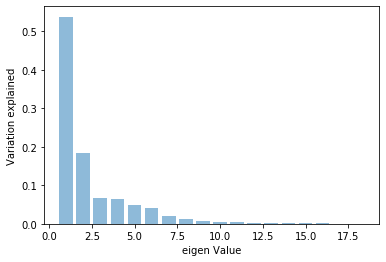

In [127]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

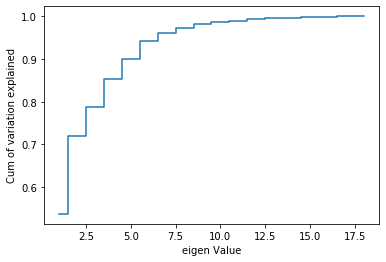

In [128]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()

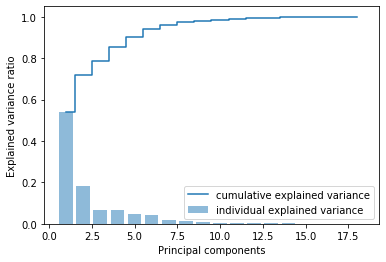

In [129]:
plt.bar(range(1,19), pca.explained_variance_ratio_, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,19),np.cumsum(pca.explained_variance_ratio_), where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

 # Quick Observation:

- **From above we plot we can clealry observer that 9 dimension() are able to explain 95 percent variance of data.** 
- **so we will use first 9 principal components going forward and calulate the reduced dimensions.** 

# Dimensionality Reduction

In [130]:
pca9 = PCA(n_components=9)
pca9.fit(pca_feature_Scaled)
print(pca9.components_)
print(pca9.explained_variance_ratio_)
Xpca9 = pca9.transform(pca_feature_Scaled)

[[ 0.27255188  0.28853824  0.30262946  0.2677941   0.09596715  0.18374833
   0.31124654 -0.30941632  0.30801691  0.27938939  0.30150327  0.30749359
   0.26508066 -0.04105981  0.04127981  0.05853512  0.03602207  0.08249763]
 [-0.09252382  0.12908671 -0.05144319 -0.1947202  -0.24244796 -0.10248642
   0.07182588 -0.00925189  0.08418297  0.11895791  0.07372056  0.07879544
   0.20949295  0.50029203 -0.03933894 -0.09853885 -0.50746841 -0.51365583]
 [ 0.01175952 -0.20536425  0.09163182 -0.02969628 -0.24509482 -0.142455
   0.12070646 -0.08572693  0.12454344 -0.2049008   0.11887927  0.12397537
  -0.21318948  0.01901213 -0.39921069  0.74271567 -0.04568081 -0.01528592]
 [-0.2002712  -0.01109124 -0.06835235  0.28253577  0.61043723 -0.04535457
  -0.01502024 -0.0525642  -0.03993182 -0.05623343  0.08450271 -0.02167273
   0.00446537  0.15707057 -0.65173051 -0.16723402 -0.04666784 -0.07506428]
 [ 0.16512229 -0.11625948 -0.10551558  0.10531868  0.08346944 -0.78579096
   0.11114381 -0.11734007  0.1030758

In [131]:
#Split the PCA data into train and test.

xtrain_pca9, xtest_pca9, ytrain_pca9, ytest_pca9 = train_test_split(Xpca9, pca_target, test_size = 0.30, random_state=1)

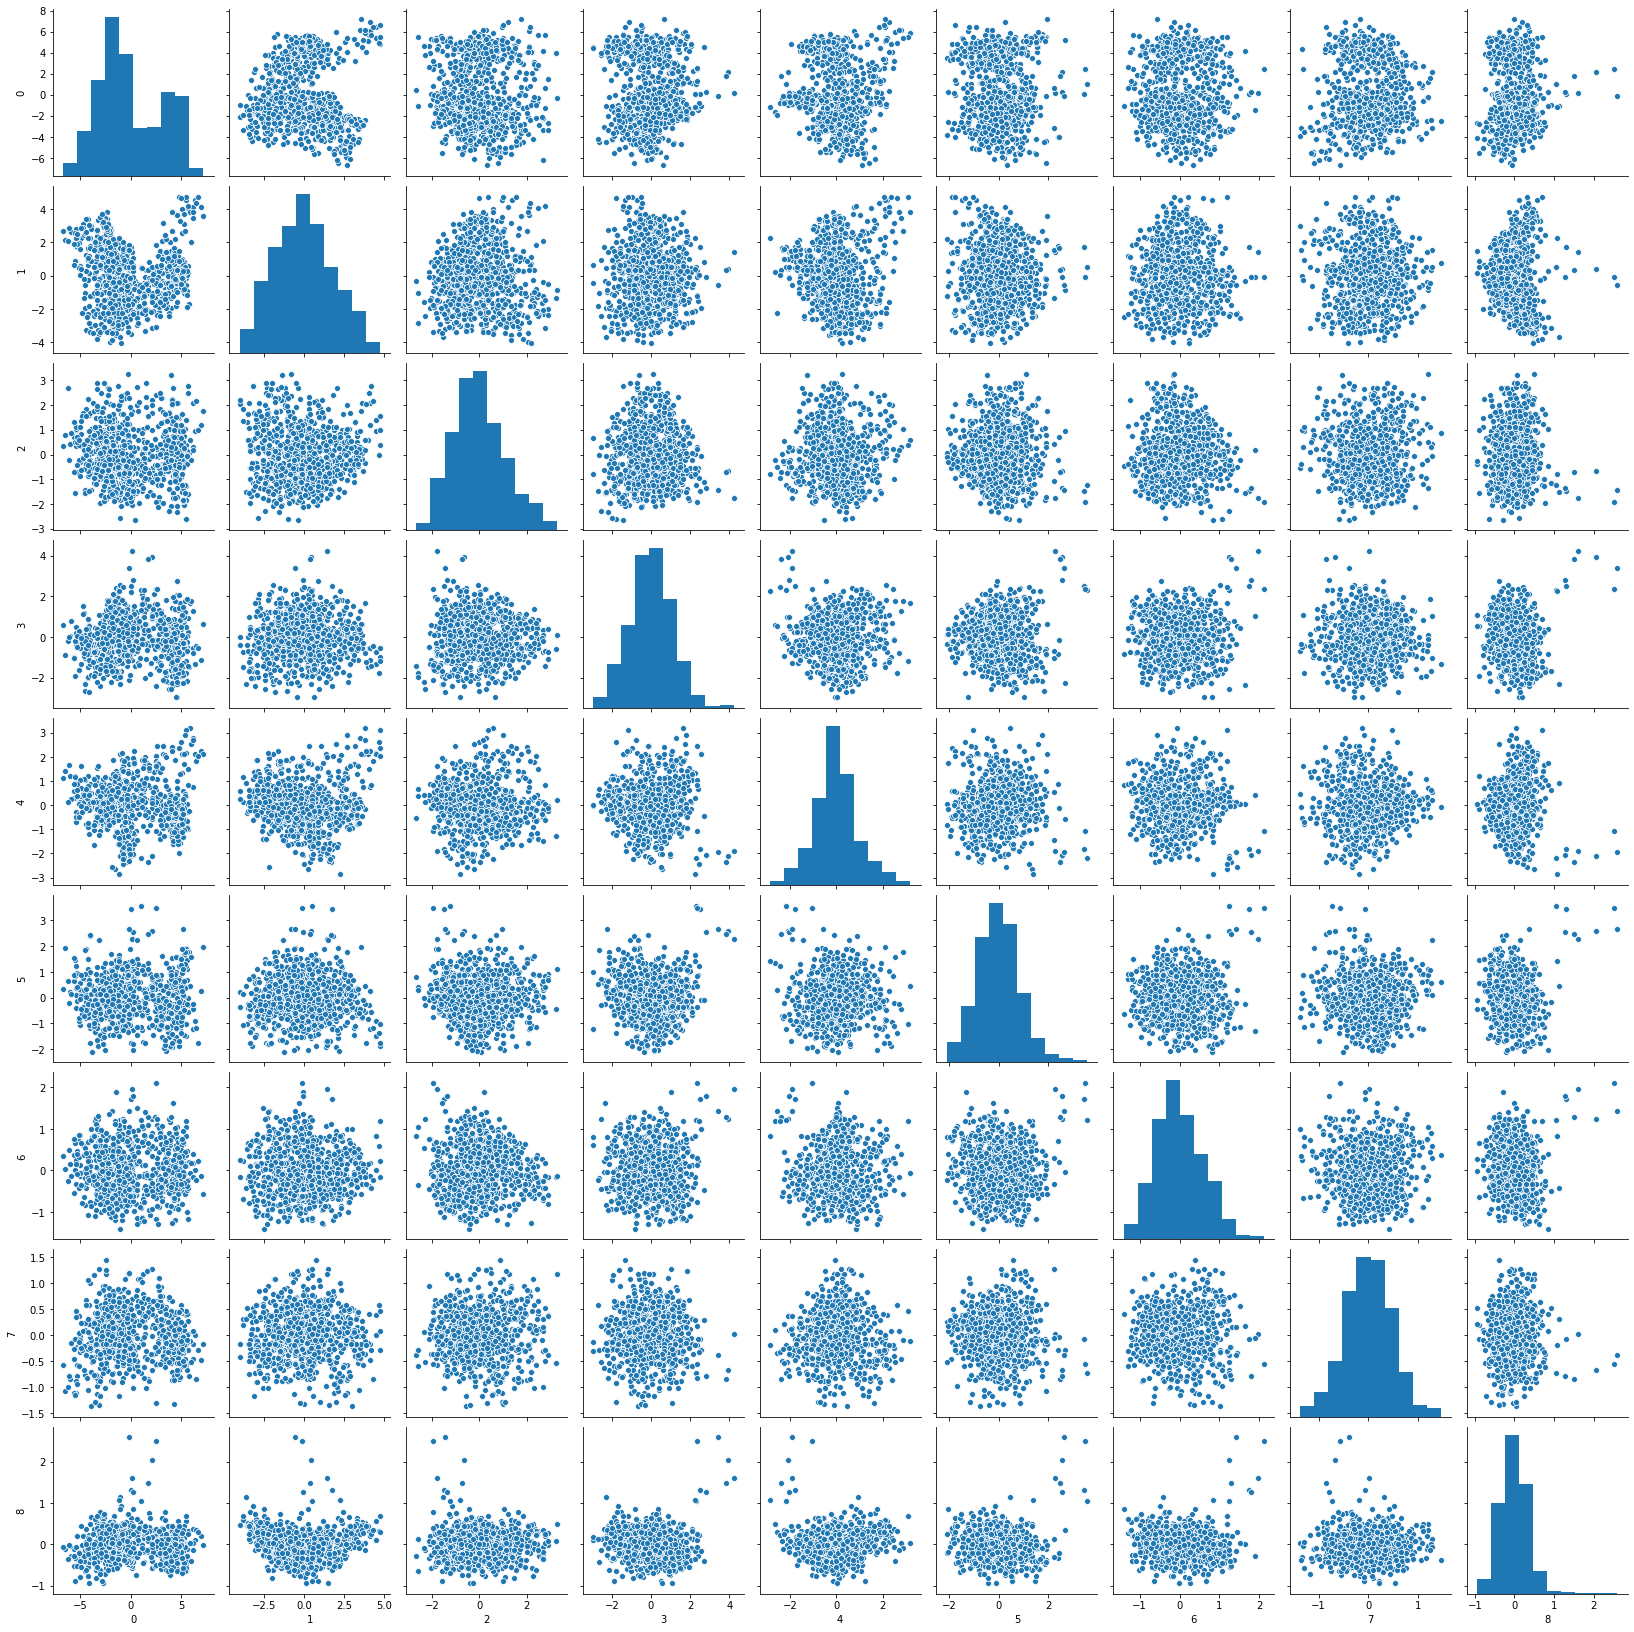

In [132]:
sns.pairplot(pd.DataFrame(Xpca9))

In [133]:
pca6 = PCA(n_components=6)
pca6.fit(pca_feature_Scaled)
print(pca6.components_)
print(pca6.explained_variance_ratio_)
Xpca6 = pca6.transform(pca_feature_Scaled)

[[ 0.27255188  0.28853824  0.30262946  0.2677941   0.09596715  0.18374833
   0.31124654 -0.30941632  0.30801691  0.27938939  0.30150327  0.30749359
   0.26508066 -0.04105981  0.04127981  0.05853512  0.03602207  0.08249763]
 [-0.09252382  0.12908671 -0.05144319 -0.1947202  -0.24244796 -0.10248642
   0.07182588 -0.00925189  0.08418297  0.11895791  0.07372056  0.07879544
   0.20949295  0.50029203 -0.03933894 -0.09853885 -0.50746841 -0.51365583]
 [ 0.01175952 -0.20536425  0.09163182 -0.02969628 -0.24509482 -0.142455
   0.12070646 -0.08572693  0.12454344 -0.2049008   0.11887927  0.12397537
  -0.21318948  0.01901213 -0.39921069  0.74271567 -0.04568081 -0.01528592]
 [-0.2002712  -0.01109124 -0.06835235  0.28253577  0.61043723 -0.04535457
  -0.01502024 -0.0525642  -0.03993182 -0.05623343  0.08450271 -0.02167273
   0.00446537  0.15707057 -0.65173051 -0.16723402 -0.04666784 -0.07506428]
 [ 0.16512229 -0.11625948 -0.10551558  0.10531868  0.08346944 -0.78579096
   0.11114381 -0.11734007  0.1030758

In [134]:
#Split the PCA data into train and test.

xtrain_pca6, xtest_pca6, ytrain_pca6, ytest_pca6 = train_test_split(Xpca6, pca_target, test_size = 0.30, random_state=1)

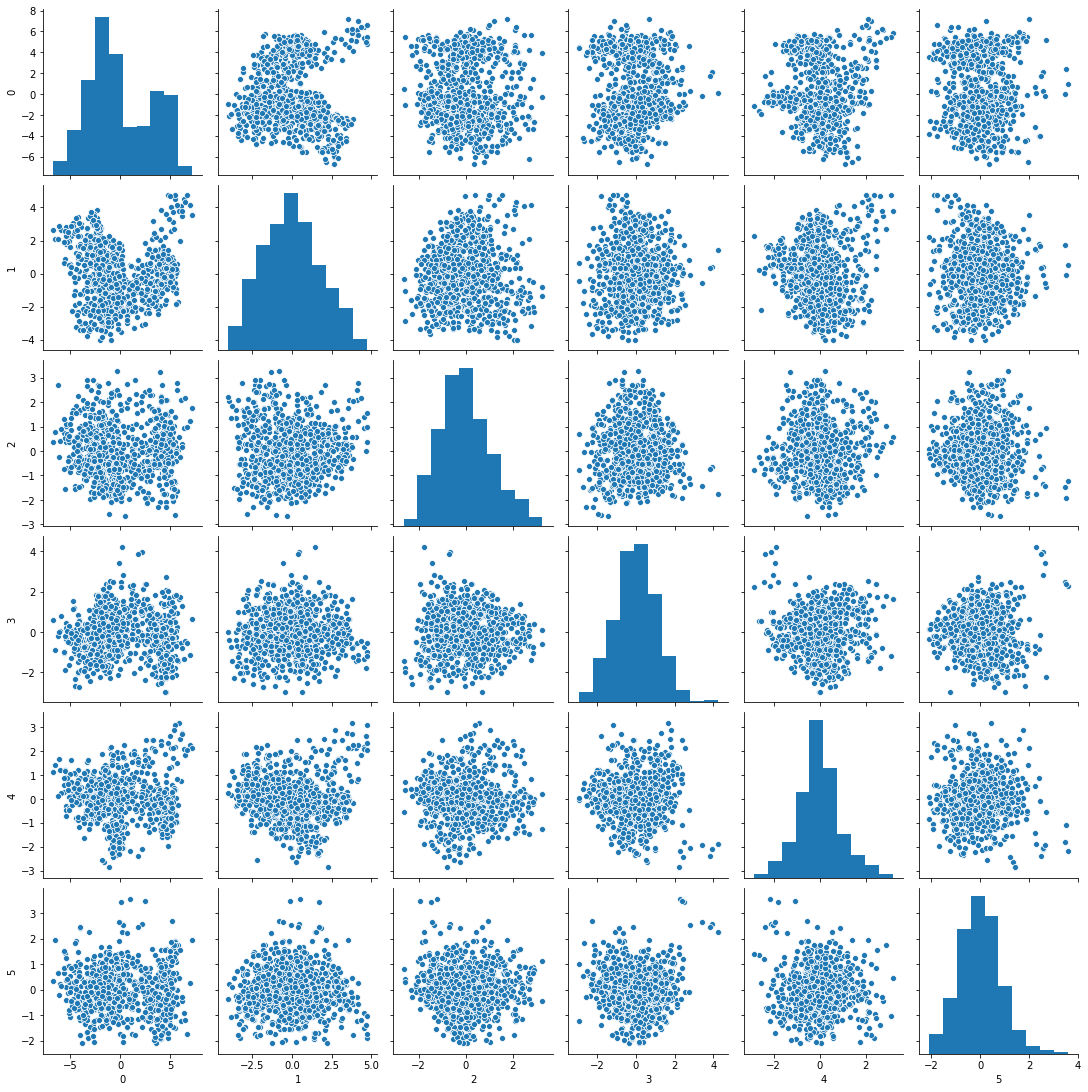

In [135]:
sns.pairplot(pd.DataFrame(Xpca6))


In [136]:
pca3 = PCA(n_components=3)
pca3.fit(pca_feature_Scaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(pca_feature_Scaled)

[[ 0.27255188  0.28853824  0.30262946  0.2677941   0.09596715  0.18374833
   0.31124654 -0.30941632  0.30801691  0.27938939  0.30150327  0.30749359
   0.26508066 -0.04105981  0.04127981  0.05853512  0.03602207  0.08249763]
 [-0.09252382  0.12908671 -0.05144319 -0.1947202  -0.24244796 -0.10248642
   0.07182588 -0.00925189  0.08418297  0.11895791  0.07372056  0.07879544
   0.20949295  0.50029203 -0.03933894 -0.09853885 -0.50746841 -0.51365583]
 [ 0.01175952 -0.20536424  0.09163182 -0.02969627 -0.24509483 -0.142455
   0.12070646 -0.08572695  0.12454343 -0.20490081  0.11887926  0.12397536
  -0.21318948  0.01901213 -0.39921069  0.74271567 -0.04568081 -0.01528591]]
[0.53759807 0.18331004 0.06641103]


In [137]:
#Split the PCA data into train and test.

xtrain_pca3, xtest_pca3, ytrain_pca3, ytest_pca3 = train_test_split(Xpca3, pca_target, test_size = 0.30, random_state=1)

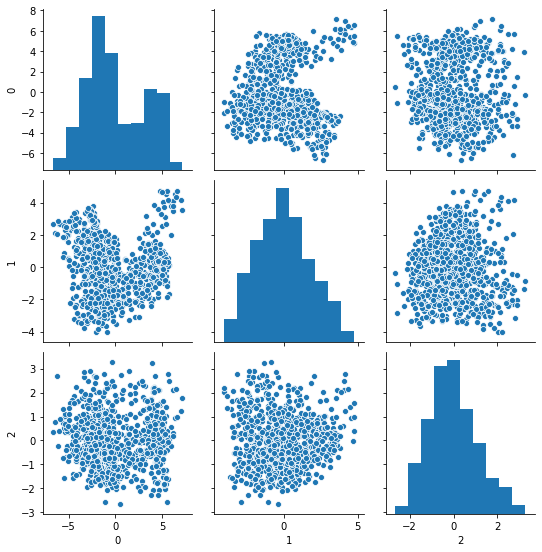

In [138]:
sns.pairplot(pd.DataFrame(Xpca3))


# Fit SVM Model

In [139]:
svm1_PCA_9 = svm.SVC(gamma=0.025, C=3, random_state=1,probability=True)
#xtrain_pca3, xtest_pca3, ytrain_pca3, ytest_pca3
svm1_PCA_9.fit(xtrain_pca9,ytrain_pca9)
y_PCA9_Prid = svm1_PCA_9.predict(xtest_pca9)
print(svm1_PCA_9.score(xtest_pca9, ytest_pca9))
print(svm1_PCA_9.score(xtrain_pca9, ytrain_pca9))

0.9566929133858267
0.9662162162162162


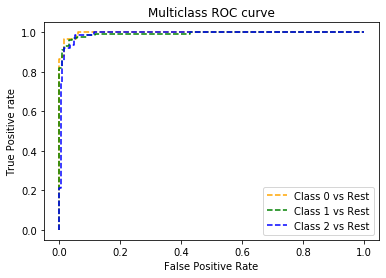

In [140]:
# roc curve for classes
from sklearn.metrics import roc_curve
pred_prob = svm1_PCA_9.predict_proba(xtest_pca9)
fpr_9 = {}
tpr_9 = {}
thresh_9 ={}

n_class_9 = 3
#xtrain_pca9, xtest_pca9, ytrain_pca9, ytest_pca9
for i in range(n_class_9):    
    fpr_9[i], tpr_9[i], thresh_9[i] = roc_curve(ytest_pca9, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr_9[0], tpr_9[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr_9[1], tpr_9[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr_9[2], tpr_9[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

In [141]:
result_PCA9 = pd.DataFrame({'Model' : 'PCA9',
                            'Accuracy Score' : [metrics.accuracy_score(ytest_pca9 , y_PCA9_Prid)],
                            'Train Score' : [svm1_PCA_9.score(xtrain_pca9,ytrain_pca9)],
                           'Test Score' : [svm1_PCA_9.score(xtest_pca9, ytest_pca9)]})
print(result_PCA9)                

  Model  Accuracy Score  Train Score  Test Score
0  PCA9        0.956693     0.966216    0.956693


Confusion Matrix For : 
 PCA 9 data set [[ 57   2   0]
 [  1 129   3]
 [  2   3  57]]


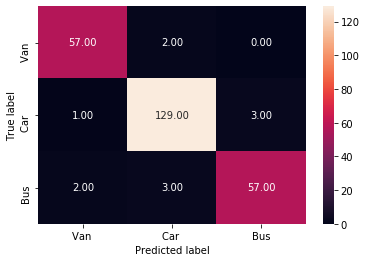

In [142]:
draw_confmatrix(ytest_pca9, y_PCA9_Prid,"Van ", "Car ", "Bus", "PCA 9 data set" )

In [143]:
svm1_PCA_3 = svm.SVC(gamma=0.025, C=3, random_state=1,probability=True)
#xtrain_pca3, xtest_pca3, ytrain_pca3, ytest_pca3
svm1_PCA_3.fit(xtrain_pca3,ytrain_pca3)
y_PCA3_Prid = svm1_PCA_3.predict(xtest_pca3)
print(svm1_PCA_3.score(xtest_pca3, ytest_pca3))
print(svm1_PCA_3.score(xtrain_pca3, ytrain_pca3))

0.6811023622047244
0.6993243243243243


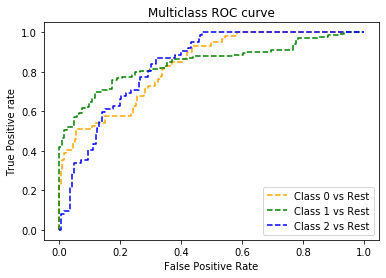

In [144]:
# roc curve for classes
from sklearn.metrics import roc_curve
pred_prob = svm1_PCA_3.predict_proba(xtest_pca3)
fpr_3 = {}
tpr_3 = {}
thresh_3 ={}

n_class_3 = 3
#xtrain_pca3, xtest_pca3, ytrain_pca3, ytest_pca3
for i in range(n_class_3):    
    fpr_3[i], tpr_3[i], thresh_3[i] = roc_curve(ytest_pca3, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr_3[0], tpr_3[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr_3[1], tpr_3[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr_3[2], tpr_3[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300);    

In [145]:
result_pca3 = pd.DataFrame({'Model' : 'PCA3','Accuracy Score' : [metrics.accuracy_score(ytest_pca3 , y_PCA3_Prid)],
                            'Train Score' : [svm1_PCA_3.score(xtrain_pca3,ytrain_pca3)],
                           'Test Score' : [svm1_PCA_3.score(xtest_pca3, ytest_pca3)]})
print(result_pca3)                

  Model  Accuracy Score  Train Score  Test Score
0  PCA3        0.681102     0.699324    0.681102


Confusion Matrix For : 
 PCA 3 data set [[ 30  15  14]
 [  6 103  24]
 [  8  14  40]]


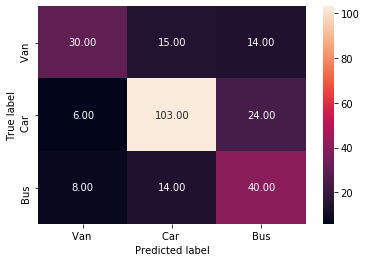

In [146]:
draw_confmatrix(ytest_pca3, y_PCA3_Prid,"Van ", "Car ", "Bus", "PCA 3 data set" )

In [147]:
from sklearn import svm
from sklearn import metrics
#xtrain_pca6, xtest_pca6, ytrain_pca6, ytest_pca6 
svm1_PCA_6 = svm.SVC(gamma=0.025, C=3, random_state=1,probability=True)
svm1_PCA_6.fit(xtrain_pca6,ytrain_pca6)
y_PCA6_Prid = svm1_PCA_6.predict(xtest_pca6)
print(svm1_PCA_6.score(xtrain_pca6,ytrain_pca6))
print(svm1_PCA_6.score(xtest_pca6, ytest_pca6))

0.9256756756756757
0.9133858267716536


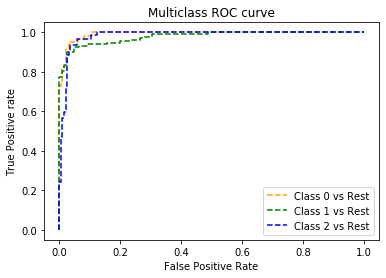

In [148]:
# roc curve for classes
from sklearn.metrics import roc_curve
pred_prob_6 = svm1_PCA_6.predict_proba(xtest_pca6)
fpr_6 = {}
tpr_6 = {}
thresh_6 ={}

n_class_6 = 3
#xtrain_pca6, xtest_pca6, ytrain_pca6, ytest_pca6
for i in range(n_class_6):    
    fpr_6[i], tpr_6[i], thresh_6[i] = roc_curve(ytest_pca6, pred_prob_6[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr_6[0], tpr_6[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr_6[1], tpr_6[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr_6[2], tpr_6[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=600);    

In [149]:
result_pca6 = pd.DataFrame({'Model' : 'PCA6','Accuracy Score' : [metrics.accuracy_score(ytest_pca6 , y_PCA6_Prid)],
                            'Train Score' : [svm1_PCA_6.score(xtrain_pca6,ytrain_pca6)],
                           'Test Score' : [svm1_PCA_6.score(xtest_pca6, ytest_pca6)]})
print(result_pca6)                

  Model  Accuracy Score  Train Score  Test Score
0  PCA6        0.913386     0.925676    0.913386


Confusion Matrix For : 
 PCA 6 data set [[ 54   3   2]
 [  4 120   9]
 [  2   2  58]]


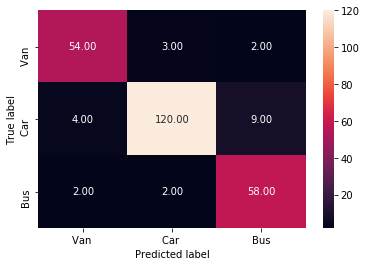

In [150]:
draw_confmatrix(ytest_pca6, y_PCA6_Prid,"Van ", "Car ", "Bus", "PCA 6 data set" )

In [151]:
frames = [result_raw, result_pca3,result_pca6,result_PCA9]

result = pd.concat(frames)

In [158]:
result

Model  Accuracy Score  Train Score  Test Score
0  No PCA        0.535433     1.000000    0.535433
0    PCA3        0.681102     0.699324    0.681102
0    PCA6        0.913386     0.925676    0.913386
0    PCA9        0.956693     0.966216    0.956693

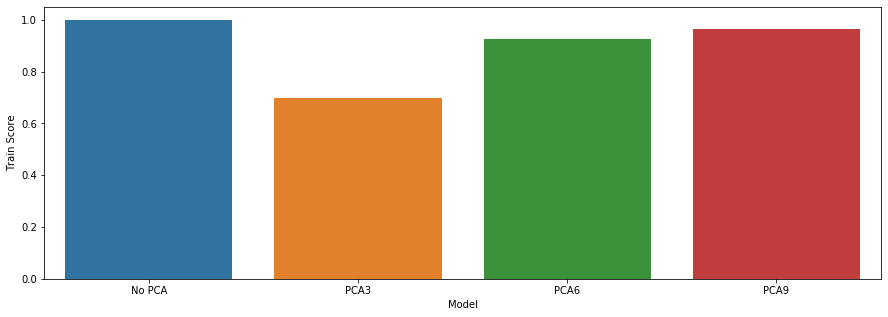

In [152]:
plt.figure(figsize=(15,5))
sns.barplot(data=result,x=result['Model'],y=result['Train Score'])
plt.show()

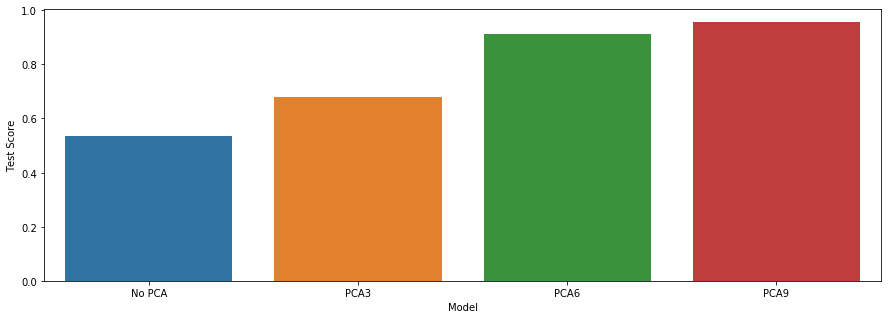

In [153]:
plt.figure(figsize=(15,5))
sns.barplot(data=result,x=result['Model'],y=result['Test Score'])
plt.show()

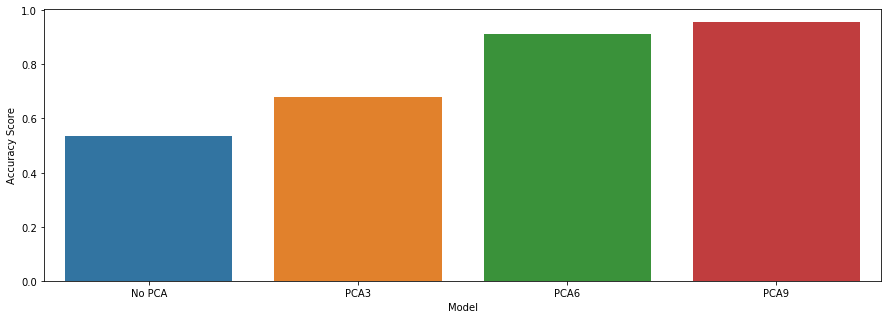

In [154]:
plt.figure(figsize=(15,5))
sns.barplot(data=result,x=result['Model'],y=result['Accuracy Score'])
plt.show()

# Observation
- **PCA with 9 dimensions is giving better results for SVM with 96% accuracy**
- **PCA data set impacts the model perfromance specially on training data set , we have here achived our objective and saw that PCA is great tool to make our model perfrom better .**
- **learned that one should always make sure data is normalized/scaled before perfroming PCA, else the result will not be as per expectations**
- **Also tried every bit of techniques of removing outliers, treating the missing value.**